In [1]:
import pandas
import sys
import os
from matplotlib import pyplot

from c1boxplot import boxplot

In [2]:
mouselimb = pandas.read_csv('190425MouseLimb10XMeta.csv', index_col=0, dtype={'ident': str})

In [3]:
mouselimb.head()

,nGene,ident
limb12_13_0AAACCTGAGATCGATA_1,3404,3
limb12_13_0AAACCTGAGATGAGAG_1,2322,2
limb12_13_0AAACCTGAGCAGATCG_1,2162,5
limb12_13_0AAACCTGAGCGATCCC_1,3771,6
limb12_13_0AAACCTGAGTGTACCT_1,2517,1


In [4]:
MouseColorDict = {
    '0':'#000000',
    '1':'#0118FA',
    '2':'#C0C0C0',
    '3':'#00FFFF',
    '4':'#FF8380',
    '5':'#8B8A1D',
    '6':'#CAC379',
    '7':'#00FF00',
    '8':'#FFFA2C',
    '9':'#C39CFB',
    '10':'#7762F0',
    '11':'#717E8D',
    '12':'#A71206',
    '13':'#35B5E2',
    '14':'#9834E7',
    '15':'#995432',
    '16':'#483F84',
    '17':'#ff0000',
    '18':'#216407',
    '19':'#ff42ef',
    '20':'#FBC83C',
    '21':'#FF9A21',
    '22':'#B4246E',
    '23':'#09658A',
    '24':'#016edb'}

MouseDict={
    '0':'Mesenchymal cell 1',
    '1':'Perichondrial cell',
    '2':'Mesenchymal cell 2',
    '3':'Chondrocyte',
    '4':'Muscle 2',
    '5':'Epithelium 1',
    '6':'Fibroblast',
    '7':'Muscle 1',
    '8':'Macrophage',
    '9':'Endothelium',
    '10':'FoxP1(+) perichondrial cell',
    '11':'Tenocyte',
    '12':'Muscle 4',
    '13':'Early erythrocyte',
    '14':'Neural crest',
    '15':'Stressed mesenchymal cell',
    '16':'Osteoblast',
    '17':'Muscle 3',
    '18':'Epithelium 2',
    '19':'Smooth muscle cell',
    '20':'EMP',
    '21':'Megakaryocyte',
    '22':'Col1a1 + Muscle 4',
    '23':'Late erythrocyte',
    '24':'Ihh(+) chondrocyte'
}


In [5]:
order_list = [
    'Muscle 4',
    'Col1a1 + Muscle 4',
    'Muscle 3',
    'Muscle 2',
    'Muscle 1',
    'Smooth muscle cell',
    'Perichondrial cell',
    'FoxP1(+) perichondrial cell',
    'Osteoblast',
    'Chondrocyte',
    'Ihh(+) chondrocyte',
    'Tenocyte',
    'Mesenchymal cell 1',
    'Mesenchymal cell 2',
    'Stressed mesenchymal cell',
    'Fibroblast',
    'Macrophage',
    'EMP',
    'Megakaryocyte',
    'Late erythrocyte',
    'Early erythrocyte',
    'Epithelium 2',
    'Epithelium 1',
    'Endothelium',
    'Neural crest',
]
order_key = { MouseDict[k]: k for k in MouseDict }
order = [ order_key[c] for c in order_list]

In [6]:
mouselimb['color'] = mouselimb['ident'].apply(lambda x: MouseColorDict[x])
mouselimb['cluster_name'] = mouselimb['ident'].apply(lambda x: MouseDict[x])

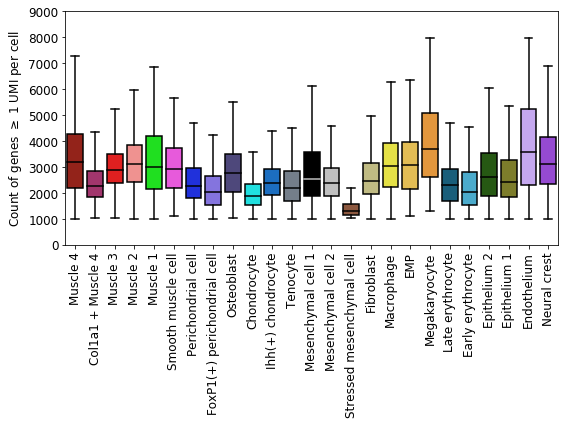

In [7]:
def plot_boxplot(expressed):
    font_size = 12.0
    f = pyplot.figure(figsize=(8,6))
    ax = f.add_subplot(1,1,1)
    bp = boxplot(x='ident', y='nGene', order=order, 
                        palette=MouseColorDict, 
                        data=expressed, 
                        showfliers=False,
                        #medianprops={'color': '#FFFFFF'},
                        #notch=True,
                        ax=ax)
    #_ = ax.set_ylabel('Count of genes $\geq$ 1 FPKM per cell', size=font_size)
    _ = ax.set_ylabel('Count of genes $\geq$ 1 UMI per cell', size=font_size)
    _ = ax.set_xlabel('')
    
    labels = ax.get_yticklabels()
    for l in labels:
        l.set_fontsize(font_size)

    labels = ax.get_xticklabels()
    for l in labels:
        l.set_text(MouseDict[l.get_text()])
        l.set_fontsize(font_size)    
    _ = ax.set_xticklabels(labels, rotation=90, ha='center')
    _ = ax.set_ylim(0, 9000)
    f.tight_layout()
    return f, ax
f, bp = plot_boxplot(mouselimb)

In [8]:
f.savefig('10x_genes_gt_1_UMI.png')

In [9]:
f.savefig('10x_genes_gt_1_UMI.tiff')

In [10]:
f.savefig('10x_genes_gt_1_UMI.eps')